# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


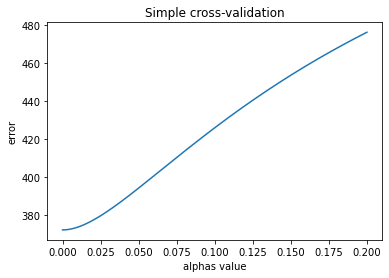

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def reg_predict(inputs, w, b):
    results = []
    for inp in inputs:
        results.append(inp*w+b)
    return results

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
old_x=x
x = np.asmatrix(np.c_[np.ones((15,1)),x]) #bias column added to avoid reaching (0,0) point


for i in range(y.shape[0]):
        print(i)

I = np.identity(2)# 1 matrix
alphas = np.arange(0,0.2,0.0001) # change here
res=[]
# add 1-3 line of code here
err_arr=[]
for alpha in alphas:
    i=0
    err=0
    for f_x in x:
        x_in = x
        y_in = y
        x_in = np.delete(x_in, i, axis=0)
        y_in = np.delete(y_in, i, axis=0)

        w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
        w=w.ravel()
        res.append(w)
        y_out = x * w.T
        err += (y[i] - y_out[i]) ** 2
        i=i+1
    err = err / y.shape[0]
    err_arr.append(err[0, 0])
# add 1-3 lines to compare the results
fig, ax = plt.subplots()
ax.plot(alphas, err_arr)
ax.set(xlabel='alphas value', ylabel='error', title='Simple cross-validation')
plt.show()


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [14]:
import numpy as np

def sgd(alpha,x,y):
    # your code goes here
    #epochs = iteration
    
    normalized = np.linalg.norm(x, axis=0)
    counter = 0
    w = 1
    b = 1
    
    for epoch in range(0,epochs):
        x_res = x[:, 1].reshape(-1, 1)
        y_pre = x_res * w + b
        delta = y - y_pre

        if w <= 0:
            dW = (-x_res.T.dot(delta) * 2 - alpha ) / (normalized[1] * normalized[1])
        else:
            dW = (-x_res.T.dot(delta) * 2 + alpha ) / (normalized[1] * normalized[1])

        db= (-np.sum(y - y_pre) * 2) / (normalized[0] * normalized[0])

        w = w - alpha * dW
        b = b - alpha * db
    
    return w,b

In [27]:
epochs = 100000

    

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 


w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line

w_r,b= sgd(alpha,x, y)
lasso = (np.linalg.inv(x.T*x + alpha * I)*x.T*y).ravel()

print(w_r)
print(b)
print(lasso)

[[1.61812989]]
-180.92181407910007
[[-101.72397081    1.16978757]]


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_targets = pd.DataFrame(iris_data.target)

iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)','petal length (cm)']].values # change here, added 1 more feature
y = iris_targets.values # change here
print(iris_targets)

dataset_size = np.size(x)

mean_x, mean_y, mean_z = np.mean(x), np.mean(y), np.mean(z)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]
